<a href="https://www.kaggle.com/code/pablosebastintufino/cyclistic-bike-share-project?scriptVersionId=97752942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic Bike Share Project (Python)

# Introduction
This analysis is for a Google Analytics Certificate capstone project. Kevin Hartman’s case study was the inspiration for this piece.

A company called Cyclistic developed a successful bike-share program in 2016. Since then, the initiative has grown to include a fleet of 5,824 bicycles that are geotracked and locked into 692 stations throughout Chicago.

Until date, Cyclistic’s marketing strategy has focused on building general awareness and appealing to a wide range of consumers. “Casual” riders are customers who purchase single-ride or full-day passes. Cyclistic “members” are customers who purchase annual memberships.

Annual members are substantially more profitable than casual riders, according to Cyclistic’s financial analysts. The company’s future prosperity, according to the director of marketing, hinges on increasing the number of yearly subscribers.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# 2. Ask
**Defining the problem**

As Cyclistic realized that having more annual customers than casual riders will improve their earnings. They want to reach out to their “casual” riders, to convince them to switch to an annual subscription. In order to do so, they must first determine how the “casual” and “annual” customers differ in order to create a targeted and effective marketing message for the “casual” customers.

**Business Task**

The business task is to identify the differences between casual and annual riders in order to come up with a proper message to campaign to the casual users convincing them to switch to annual subscription. Hence, the question to be answered is:

How do annual members and casual riders use Cyclistic bikes differently?
Key Stakeholders

**Cyclistic executive team**
* My manager, Lily Moreno
* Director of marketing
* The rest of the marketing analytics team

# 3.Prepare


**Source of Data**

* Data was collected from Motivate International Inc under this license. Hence, it is public data.
Since Cyclistic is a fictional company, the datasets have different names.

**Data organization
**

* 12 csv. Files
* 13 variables

**Data credibility**

The data appears to be in good condition, and it is first-hand information, with a large number of entries and a lot of important information.

**ROCCC Analysis**

* Reliability - I think it is reliable although it is not clear if it was vetted.
* Original - Yes
* Comprehensive - I think the data is not 100% comprehensive since some information is missing although its nominal.
* Current - 12 months old
* Cited - Yes

Sort and filter the Data The data which i used was from 2021-2022. This is so because it is the most relevant period to the aforementioned business task. In addition to that, it is the period when the data is complete whereby all geo-location coordinates and bike types are included.

# 4. Process

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
Jan = pd.read_csv('../input/cyclisticbikeshare/202101-divvy-tripdata.csv')
Feb = pd.read_csv('../input/cyclisticbikeshare/202102-divvy-tripdata.csv')
Mar = pd.read_csv('../input/cyclisticbikeshare/202103-divvy-tripdata.csv')
Apr = pd.read_csv('../input/cyclisticbikeshare/202104-divvy-tripdata.csv')
May = pd.read_csv('../input/cyclisticbikeshare/202105-divvy-tripdata.csv')
Jun = pd.read_csv('../input/cyclisticbikeshare/202106-divvy-tripdata.csv')
Jul = pd.read_csv('../input/cyclisticbikeshare/202107-divvy-tripdata.csv')
Aug = pd.read_csv('../input/cyclisticbikeshare/202108-divvy-tripdata.csv')
Sep = pd.read_csv('../input/cyclisticbikeshare/202109-divvy-tripdata.csv')
Oct = pd.read_csv('../input/cyclisticbikeshare/202110-divvy-tripdata.csv')
Nov = pd.read_csv('../input/cyclisticbikeshare/202111-divvy-tripdata.csv')
Dec = pd.read_csv('../input/cyclisticbikeshare/202112-divvy-tripdata.csv')


In [3]:
df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

# Joining 12 CSV's into 1 and naming it as "df". from year 2021

df

# Top 5 & bottom 5 rows of dataframe "df".

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,1/23/2021 16:14,1/23/2021 16:24,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,1/27/2021 18:43,1/27/2021 18:47,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,1/21/2021 22:35,1/21/2021 22:37,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,1/7/2021 13:31,1/7/2021 13:42,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,1/23/2021 2:24,1/23/2021 2:24,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


# 4.1 Cleaning Process

In [4]:
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])

In [5]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,41.860000,-87.720000,41.850000,-87.710000,member
247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,41.877850,-87.624080,41.881320,-87.629521,member


In [6]:
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')

# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

In [7]:
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')

# Creating New Column "ride_length" and changing its datatype to "int32"
# In this column, each row contains the difference between "starting time" and "ending time" columns in minutes

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,41.900341,-87.696743,41.89,-87.72,member,10
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,41.900333,-87.696707,41.90,-87.69,member,4
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,41.900313,-87.696643,41.90,-87.70,member,2
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,41.900399,-87.696662,41.92,-87.69,member,11
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,41.900326,-87.696697,41.90,-87.70,casual,0


In [9]:
df.sort_values(by = 'ride_length')

# Sorting Values by "ride_length" column in Ascending order.

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
56721,7CA158F5F050156E,electric_bike,2021-11-07 01:58:08,2021-11-07 01:00:06,41.920020,-87.648990,41.930000,-87.650000,casual,-58
142091,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,41.911738,-87.632145,41.921762,-87.644034,casual,-55
125855,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,41.922167,-87.638888,41.911386,-87.638677,member,-54
282673,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,41.928712,-87.653833,41.935733,-87.663576,casual,-53
260820,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,41.912580,-87.681424,41.902906,-87.687367,member,-53
...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,41.929567,-87.707857,41.889955,-87.680651,casual,49107
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,41.886021,-87.630876,41.889955,-87.680651,casual,52701
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,41.877181,-87.627844,41.872596,-87.633502,casual,53921
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,41.892278,-87.612043,41.889955,-87.680651,casual,55691


In [10]:
# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.

df[df['ride_length'] < 0].count()

# Number of rows containing Negative Values.

ride_id          76
rideable_type    76
started_at       76
ended_at         76
start_lat        76
start_lng        76
end_lat          75
end_lng          75
member_casual    76
ride_length      76
dtype: int64

In [11]:
df[df['ride_length'] < 1].count()

# Number of rows containing "ride length" less than "1" minute.

ride_id          84650
rideable_type    84650
started_at       84650
ended_at         84650
start_lat        84650
start_lng        84650
end_lat          84617
end_lng          84617
member_casual    84650
ride_length      84650
dtype: int64

In [12]:
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

df

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,41.900341,-87.696743,41.890000,-87.720000,member,10
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,41.900333,-87.696707,41.900000,-87.690000,member,4
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,41.900313,-87.696643,41.900000,-87.700000,member,2
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,41.900399,-87.696662,41.920000,-87.690000,member,11
4,5D8969F88C773979,electric_bike,2021-01-09 14:24:00,2021-01-09 15:17:00,41.900409,-87.696763,41.940000,-87.710000,casual,53
...,...,...,...,...,...,...,...,...,...,...
5510408,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,41.882289,-87.639752,41.890000,-87.610000,casual,19
5510409,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,41.882123,-87.640053,41.889106,-87.638862,member,7
5510410,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,41.881956,-87.639955,41.880254,-87.629603,member,8
5510411,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,41.860000,-87.720000,41.850000,-87.710000,member,14


<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

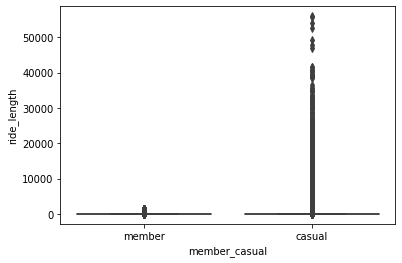

In [13]:
sns.boxplot(data = df, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

# Boxplot of column "Ride Length" to see the distribution of data between Member and Casual Rider.

In [14]:
df = df.astype({'ride_id':'string', 'rideable_type':'category'})

# Coverting datatypes of each columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510413 entries, 0 to 5510412
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
 9   ride_length    int32         
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), object(1), string(1)
memory usage: 362.6+ MB


In [15]:
df.shape

# Number of Rows and Columns

(5510413, 10)

In [16]:
df.isna().sum()

# Checking if Dataframe "df" contains any missing values

ride_id             0
rideable_type       0
started_at          0
ended_at            0
start_lat           0
start_lng           0
end_lat          4738
end_lng          4738
member_casual       0
ride_length         0
dtype: int64

In [17]:
df['ride_id'] = df['ride_id'].str.strip()

# Removing leading and trailing whitespaces in column "Ride Id".

df[df['ride_id'].duplicated()]

# View any duplicate rows

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length


# 5. Analyze and Share

In [18]:
df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = df['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

df['hour'] = df['started_at'].dt.hour

df = df.astype({'year':'int16', 'hour':'int8'})

# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,41.900341,-87.696743,41.89,-87.72,member,10,2021,January,Saturday,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,41.900333,-87.696707,41.90,-87.69,member,4,2021,January,Wednesday,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,41.900313,-87.696643,41.90,-87.70,member,2,2021,January,Thursday,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,41.900399,-87.696662,41.92,-87.69,member,11,2021,January,Thursday,13
4,5D8969F88C773979,electric_bike,2021-01-09 14:24:00,2021-01-09 15:17:00,41.900409,-87.696763,41.94,-87.71,casual,53,2021,January,Saturday,14


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510413 entries, 0 to 5510412
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
 9   ride_length    int32         
 10  year           int16         
 11  month          category      
 12  day_of_week    category      
 13  hour           int8          
dtypes: category(3), datetime64[ns](2), float64(4), int16(1), int32(1), int8(1), object(1), string(1)
memory usage: 388.9+ MB


# 5.1
# Analyzing the Difference in Number of Rides Between Casual riders and Members.

# 5.1.1
# Total Number of Rides in 1 Year

In [20]:
pd.pivot_table(df,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,2495003
member,3015410
Total Count,5510413


In [21]:
fig_1 = df.groupby('member_casual', as_index=False).count()

px.bar(fig_1, x = 'member_casual', y = 'ride_id', range_y = [0,3000000],
        color = 'member_casual', 
        height = 500,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.2
# Number of Rides in Each Month

In [22]:
df_pv1 = pd.pivot_table(df,
              index = ['year', 'month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv1 = df_pv1.loc[(df_pv1 != 0).any(axis=1)]
df_pv1

count
                                     ride_id
year        month     member_casual         
2021        January   casual           17953
                      member           78045
            February  casual            9964
                      member           38685
            March     casual           83148
                      member          142375
            April     casual          134945
                      member          197477
            May       casual          253346
                      member          269897
            June      casual          365023
                      member          352676
            July      casual          435927
                      member          373833
            August    casual          407517
                      member          385426
            September casual          359226
                      member          385959
            October   casual          253829
                      member          367460
            November  casual          105373
                      member          248699
            December  casual           68752
                      member          174878
Total Count                          5510413

In [23]:
fig_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (Oct 2020 - Sep 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.3
# Average Number of Rides in Each Weekday

In [24]:
pd.pivot_table(df,
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
day_of_week member_casual         
Sunday      casual          474543
            member          369262
Monday      casual          282552
            member          409421
Tuesday     casual          270723
            member          458231
Wednesday   casual          275206
            member          469659
Thursday    casual          282326
            member          444521
Friday      casual          359143
            member          439065
Saturday    casual          550510
            member          425251
Total Count                5510413

In [25]:
fig_3 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()

px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.4
# Average Number of Rides in Each Hour

In [26]:
pd.pivot_table(df,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           53101
            member           32487
1           casual           38661
            member           21444
2           casual           25182
            member           12190
3           casual           13875
            member            7027
4           casual            9803
            member            8007
5           casual           12358
            member           29606
6           casual           25409
            member           80662
7           casual           46155
            member          147642
8           casual           62784
            member          170713
9           casual           75193
            member          128791
10          casual          103341
            member          127122
11          casual          134134
            member          152815
12          casual          159805
            member          177657
13          casual          171078
            member          174828
14          casual          176059
            member          171619
15          casual          186079
            member          197645
16          casual          202596
            member          253348
17          casual          233553
            member          315111
18          casual          210984
            member          267064
19          casual          164055
            member          191050
20          casual          120431
            member          129226
21          casual          102396
            member           95435
22          casual           94932
            member           73225
23          casual           73039
            member           50696
Total Count                5510413

In [27]:
fig_4 = df.groupby(['hour', 'member_casual'], as_index=False).count()

fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,400000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()

# 5.2
# Analyzing Difference in Average Ride Length Between Casual riders and Members

# 5.2.1
# Average Ride Length in 1 Year

In [28]:
pd.pivot_table(df,
               index = 'member_casual',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

,mean
,ride_length
member_casual,
casual,31.944722
member,13.377361
Total Ride Average,21.784285


In [29]:
fig_4 = round(df.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,35],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.2.2
# Average Ride Length in Each Month

In [30]:
pd.pivot_table(df,
               index = ['year', 'month', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                           ride_length
year               month     member_casual            
2021               January   casual          25.919345
                             member          12.982484
                   February  casual          49.699117
                             member          17.898255
                   March     casual          38.069527
                             member          13.677619
                   April     casual          37.993864
                             member          14.425999
                   May       casual          38.273622
                             member          14.402698
                   June      casual          37.199996
                             member          14.439262
                   July      casual          32.753615
                             member          13.989878
                   August    casual          28.654314
                             member          13.832834
                   September casual          27.680354
                             member          13.461233
                   October   casual          28.562847
                             member          12.226259
                   November  casual          22.971710
                             member          11.007740
                   December  casual          23.335321
                             member          10.691253
Total Ride Average                           21.784285

In [31]:
fig_5 = round(df.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2).dropna()

px.bar(fig_5, x = 'month', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'month': 'Months (Oct 2020 - Sep 2021)'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

* Average ride lenght of casual riders are more than twice than members in all months.
* It´s more than evident, that february is higher than the other months. In evidence, [(you can read this article here)](https://www.nbcchicago.com/news/local/nws-chicago-had-9th-snowiest-february-on-record-with-nearly-2-feet-of-snow/2450777/) Chicago had 9th Snowiest February on Record and snowstorm in 2021. 
* In other words, riders were not able to return bikes as usual and bikes were stuck with them in February. 

In [32]:
pd.pivot_table(df,
               index = ['day_of_week', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
day_of_week        member_casual            
Sunday             casual          37.592492
                   member          15.461550
Monday             casual          31.813999
                   member          12.982590
Tuesday            casual          27.858025
                   member          12.504617
Wednesday          casual          27.540308
                   member          12.539146
Thursday           casual          27.577053
                   member          12.493567
Friday             casual          30.272866
                   member          13.064929
Saturday           casual          34.685548
                   member          15.060254
Total Ride Average                 21.784285

In [33]:
fig_6 = round(df.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

* In Weekends casual riders' ride length is maximum when compared to Weekdays.
* Members' ride length tend to be almost same in all Weekdays and marginally higher in Weekends.
* Both Casual riders and Members use bikes for long rides during Weekends.

# 5.3
# Analyzing Difference in Rideable Type Usage Between Casual riders and Members.

In [34]:
pd.pivot_table(df,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1253422
              member         1955905
docked_bike   casual          310396
              member               1
electric_bike casual          931185
              member         1059504
Total Rides                  5510413

In [35]:
fig_7 = df.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(fig_7, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual', 'rideable_type' : 'Rideable Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.4
# Map Of Casual riders and Members.

In [36]:
df_start= df.groupby(['start_lat','start_lng','end_lat','end_lng','member_casual'],as_index=False).size().sort_values(by='size',ascending=False)
df_start_fin2 = df_start[df_start['size'] > 50]

In [37]:
fig = px.scatter_mapbox(df_start_fin2, lat="start_lat", lon="start_lng",color="member_casual", size="size",
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
    mapbox=dict(
#         accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.80,
            lon=-87.61
        ),
        pitch=0,
        zoom=9
    ))

fig.show()

In [38]:
# To show how many members to casuals there are
# There are 25% more members than casual
df['member_casual'].value_counts()

member    3015410
casual    2495003
Name: member_casual, dtype: int64

# 6.Act

# 6.1 Conclusions

Analysis
Differences in behavior between Casual and Member users

On average Casual users ride at least 30 minutes whilst Member users ride between 12-14 minutes at most.

The average riding duration for Casual users is longer on Saturday and Sunday (weekends).

Findings

Although Casual users on average ride the longest time more than member users during both weekdays and even more on weekends, member users ride more constantly through out the whole week.

I could not come up with any recommendations on this stage so i went a step further by:

Checking the number of rides by user type during the week.

Confirming the average travel distance by each user type.

Number of rides taken by each customer type during the week

# 6.2 Recommendations
* A new Annual Membership package for Weekend usage only will attract current Weekend casual riders.

* Promotions aiming at current Weekday casual riders must be implemented as soon as possible. Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

* A Loyalty Program for casual riders can be implemented, where occasional membership fees discounts must be given to casual riders with high loyalty points.